In [1]:
from agent import Agent
from trading_env import TradingEnv
from collections import deque
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/mohamedelgharbawy/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
WINDOW_SIZE = 160

agent = Agent(state_size=WINDOW_SIZE,action_size=1)
# TODO: Set up for every symbol
env = TradingEnv("F", window_size=WINDOW_SIZE)

/Users/mohamedelgharbawy/Documents/Fall 2022/CS 285/rl-stock-predictor/src/trading_env.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stock_history["Date"] = pd.to_datetime(self.stock_history["Date"])


In [29]:
def training(n_episodes=200, max_t=1000, eps_start=1.0, eps_end = 0.01,
       eps_decay=0.996):
    """Deep Q-Learning
    
    Params
    ======
        n_episodes (int): maximum number of training epsiodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon 
        eps_decay (float): mutiplicative factor (per episode) for decreasing epsilon
        
    """
    rewards = [] # list containing score from each episode
    rewards_window = deque(maxlen=100) # last 100 scores
    portfolio_values = [0 for _ in range(WINDOW_SIZE)]
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        total_reward = 0
        for t in range(max_t):
            action = agent.act(state,eps)
            next_state,reward,done,_ = env.step(action)
            portfolio_values.append(env.portfolio_value)
            agent.step(state,action,reward,next_state,done)
            ## above step decides whether we will train(learn) the network
            ## actor (local_qnetwork) or we will fill the replay buffer
            ## if len replay buffer is equal to the batch size then we will
            ## train the network or otherwise we will add experience tuple in our 
            ## replay buffer.
            state = next_state
            total_reward += reward
            if done:
                break
            rewards_window.append(total_reward)
            rewards.append(total_reward)
            eps = max(eps*eps_decay,eps_end)
            print('\rEpisode {}\tAverage Reward {:.2f}'.format(i_episode, np.mean(rewards_window)), end=" ")
            if i_episode %100==0:
                print('\rEpisode {}\tAverage Reward {:.2f}'.format(i_episode, np.mean(rewards_window)))
                
    return rewards, portfolio_values

In [30]:
rewards, portfolio_values = training(n_episodes=50)

Episode 50	Average Reward -0.04    

# Plot Rewards

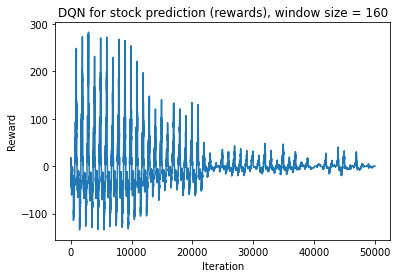

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards)), rewards)
plt.ylabel("Reward")
plt.xlabel("Iteration")
plt.title(f"DQN for stock prediction (rewards), window size = {WINDOW_SIZE}")
plt.show()

# Plot Portfolio Value

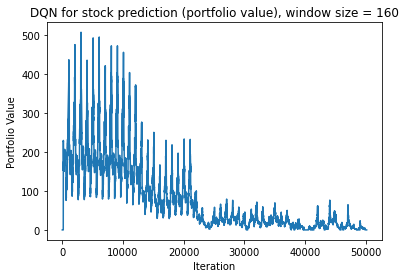

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(portfolio_values)), portfolio_values)
plt.ylabel("Portfolio Value")
plt.xlabel("Iteration")
plt.title(f"DQN for stock prediction (portfolio value), window size = {WINDOW_SIZE}")
plt.show()

In [ ]:
dataset = pd.read_csv("./data/processed/final_dataset.csv")
symbols = dataset.Symbol.unique()
symbols

In [ ]:
stock_history = dataset[dataset["Symbol"] == "F"]
stock_history["Date"] = pd.to_datetime(stock_history["Date"])
stock_history.sort_values(by="Date")
first_day = stock_history.iloc[0]

first_day.loc["Open"]